In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('D:/Ai course/4.DataScience/Datascience/UniVariate/OutliersandFrequency/Placement.csv')
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### Replace the NaN values with correct value. And justify why you havechosen the same

In [3]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
def QuanQual():
    qual=[]
    quan=[]
    for columnName in dataset.columns:
        if(dataset[columnName].dtypes=='O'):
            qual.append(columnName)
        else:
            quan.append(columnName)
    return quan,qual

In [5]:
quan,qual=QuanQual()

In [6]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [7]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [8]:
#To Replace the NAN(None)  Values We are going to follow the strategy of constant as '0'. Since all the Nan(None) values
# are related to Not Placed Candidated. Once We Replace it with the constant as '0', Dataset will be Meaningful.
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
imp.fit(dataset[quan])
df=imp.transform(dataset[quan])
df=pd.DataFrame(df,columns=quan)

In [9]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0


In [10]:
cate=dataset[qual]
cate

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [11]:
preprocessed=pd.concat([df,cate],axis=1)
preprocessed

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


### How many of them are not placed?

In [12]:
dataset['status'].value_counts()['Not Placed']

67

### Find the reason for non placement from the dataset?

In [13]:
#Predominantly students are not having experience due to which many of the students not placed

### What kind of relation between salary and mba_p

In [14]:
preprocessed['mba_p'].corr(preprocessed['salary'])
#Positive Corelation. Only 14% directly proportional

0.13982273892615557

### Which specialization is getting minimum salary?

In [95]:
dataset[['specialisation','salary']].groupby('specialisation').min()

,salary
specialisation,
Mkt&Fin,200000.0
Mkt&HR,200000.0


In [ ]:
dataset.groupby['specialisation']

### How many of them getting above 500000 salary?

In [16]:
preprocessed['salary'][preprocessed['salary']>=500000].count()

6

### Test the Analysis of Variance between etest_p and mba_p at signifancelevel 5%.(Make decision using Hypothesis Testing)

In [17]:
dataset=pd.read_csv('D:/Ai course/4.DataScience/Datascience/UniVariate/OutliersandFrequency/Placement.csv')
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [18]:
dataset['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [49]:
#Since mba_p and etest_p are dependent columns to one another and there is no condition . We are using one_way ANOVA. 
from scipy.stats import stats
tAns=stats.f_oneway(dataset['etest_p'],dataset['mba_p'])
tAns

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [50]:
# To Accept eitherh Null Hypothesis or Alternate Hypothesis
print("Null Hypothesis: There is no significantly same the salary of male and female candiate")
print("Alternate Hypothesis: There is significantly same the salary of male and female candiate ")
if(tAns.pvalue<0.05):
    print("Reject Null Hypothesis")
    print("Accept Alternate hypothesis")
    message="Accept Alternate hypothesis"
else:
    print("Reject Alternate Hypothesis")
    print("Accept Null hypothesis")
    message="Accept Null hypothesis"

Null Hypothesis: There is no significantly same the salary of male and female candiate
Alternate Hypothesis: There is significantly same the salary of male and female candiate 
Reject Null Hypothesis
Accept Alternate hypothesis


### Test the similarity between the degree_t(Sci&Tech) and specialisa-tion(Mkt&HR) with respect 
### to salary at significance level of 5%.(Makedecision using Hypothesis Testing)

In [21]:
# Since degree_t(Sci&Tech) and specialisation(Mkt&HR) are independent columns and conditions to one another,
# We are using test_ind
from scipy.stats import ttest_ind
#dataset=dataset.dropna()
degree=preprocessed[preprocessed['degree_t']=='Sci&Tech']['salary']
mba=preprocessed[preprocessed['specialisation']=='Mkt&HR']['salary']
tAns1=ttest_ind(degree,mba)
print(tAns1)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)


In [22]:
# To Accept eitherh Null Hypothesis or Alternate Hypothesis
print("Null Hypothesis: There is no significantly same the salary of male and female candiate")
print("Alternate Hypothesis: There is significantly same the salary of male and female candiate ")
if(tAns1.pvalue<0.05):
    print("Reject Null Hypothesis")
    print("Accept Alternate hypothesis")
    message="Accept Alternate hypothesis"
else:
    print("Reject Alternate Hypothesis")
    print("Accept Null hypothesis")
    message="Accept Null hypothesis"

Null Hypothesis: There is no significantly same the salary of male and female candiate
Alternate Hypothesis: There is significantly same the salary of male and female candiate 
Reject Null Hypothesis
Accept Alternate hypothesis


### What is the probability Density Function of the salary range from700000 to 900000?

In [23]:
def get_pdf_probablities(dataset,startrange,endrange):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import norm #Importing scipy to use norm function
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green') 
    # to plot the graph with the curve and histogram bar with the color, We are using distplot by importing seaborn 
    plt.axvline(startrange,color='Red')
    # To indicate the Start range and end range of the vertical line which is marking the salary Range 
    plt.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean() # Calculating Mean
    sample_stddev=sample.std() #Calculation Standard Deviation
    print('Mean=%.3f, StandardDeviation=%.3f'%(sample_mean,sample_stddev))
    dist=norm(sample_mean,sample_stddev) #By Using norm function we are plotting the Mean and Standard Deviation 
    # Using For loop We are invoking the Start Range and endranrrge values
    probabilities=[dist.pdf(value) for value in range(startrange,endrange)] 
    prob=sum(probabilities)
    print('The Area Range between ({},{}):{}'.format(startrange,endrange,prob))
    return prob

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean=288655.405, StandardDeviation=93457.452
The Area Range between (700000,900000):5.377578376230696e-06


5.377578376230696e-06

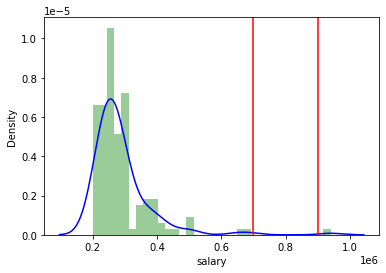

In [24]:
get_pdf_probablities(dataset['salary'],700000,900000)

### Convert the normal distribution to standard normal distribution forsalary column

In [25]:
def stdNDBgraph(dataset):
    mean=dataset.mean()
    stddev=dataset.std()
    z_score=[((j-mean)/stddev) for j in dataset] # Applying formula for Z_score with forloop for continuos iteration
    sns.distplot(z_score,kde=True) #Kde is used for the curve in the graph

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


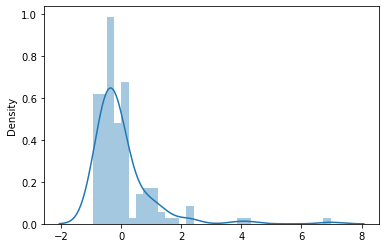

In [26]:
stdNDBgraph(dataset['salary'])

### Test the similarity between the degree_t(Sci&Tech)with respect toetest_p and mba_p at significance level of 5%.(Make decision using Hy-pothesis Testing)

In [27]:
# Since degree_t(Sci&Tech)with respect toetest_p and mba_p coumns are different and conditions are same
# We are using ttest_rel
from scipy.stats import ttest_rel
etest=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
tAns2=ttest_rel(etest,mba)

In [28]:
tAns2.pvalue

5.517920600505392e-06

In [29]:
print("Null Hypothesis: There is no significantly same the salary of male and female candiate")
print("Alternate Hypothesis: There is significantly same the salary of male and female candiate ")
if(tAns2.pvalue<0.05):
    print("Reject Null Hypothesis")
    print("Accept Alternate hypothesis")
    message="Accept Alternate hypothesis"
else:
    print("Reject Alternate Hypothesis")
    print("Accept Null hypothesis")
    message="Accept Null hypothesis"

Null Hypothesis: There is no significantly same the salary of male and female candiate
Alternate Hypothesis: There is significantly same the salary of male and female candiate 
Reject Null Hypothesis
Accept Alternate hypothesis


### Which parameter is highly correlated with salary?

In [30]:
dataset['salary'].corr(dataset['ssc_p'])

0.03533034131020019

In [31]:
dataset['salary'].corr(dataset['hsc_p'])

0.0768190329453555

In [32]:
dataset['salary'].corr(dataset['etest_p'])

0.17830730897634875

In [33]:
dataset['salary'].corr(dataset['mba_p'])

0.17501294069527482

In [34]:
dataset['salary'].corr(dataset['degree_p'])

-0.01927223457656292

In [35]:
#Comparatively, etest is Hihghly corelated with Salary

In [36]:
from scipy.stats import stats
stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])

F_onewayResult(statistic=0.6719700864663097, pvalue=0.5110602818995302)

In [37]:
preprocessed.to_csv('Preprocessed.csv')

### plot any useful graph and explain it.

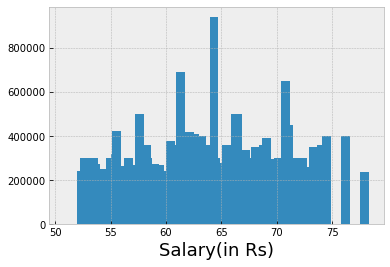

In [38]:
#Plotting Bar graph with Xlabel and Ylabel
import matplotlib.pyplot as plt
plt.style.use('bmh')
df=pd.read_csv('Preprocessed.csv')
x=df['mba_p']
y=df['salary']
plt.xlabel('mba_p',fontsize=18)
plt.xlabel('Salary(in Rs)',fontsize=18)
plt.bar(x,y)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='salary'>

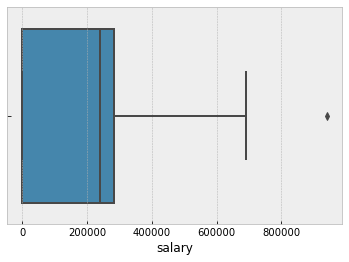

In [39]:
#Plotting Box Plot
import seaborn as sns
sns.boxplot(preprocessed['salary'],orient='v')

Text(0.5, 1.0, 'SSLC')

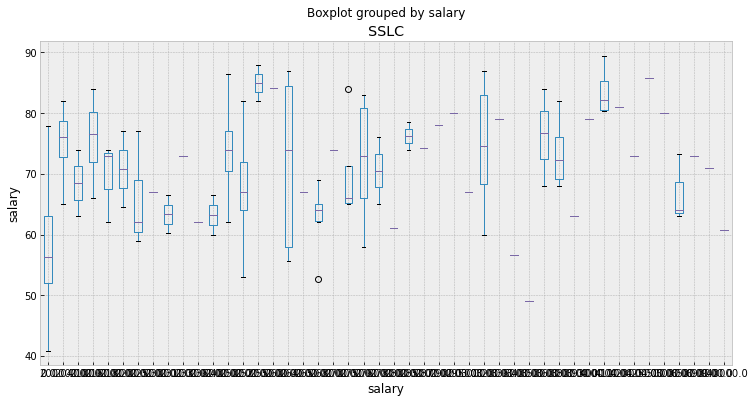

In [40]:
preprocessed=pd.read_csv('Preprocessed.csv')
ax=preprocessed.boxplot(column='ssc_p',by='salary',figsize=(12,6))
ax.set_ylabel('salary')
ax.set_title('SSLC')

### Create Normal Boxplot using One Numerical Variable

<AxesSubplot:xlabel='salary'>

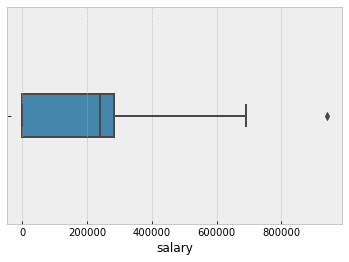

In [41]:
sns.boxplot(x='salary',data=preprocessed,width=0.2)

### Creating Boxplot using One Numerical and Categorical variable

<AxesSubplot:xlabel='specialisation', ylabel='salary'>

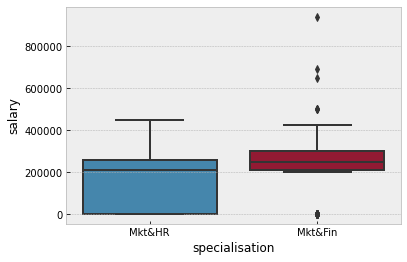

In [42]:
#sns.boxplot(x='degree_t',y='salary',data=preprocessed)
sns.boxplot(x='specialisation',y='salary',data=preprocessed)

### Adding Mean marker in the and Creating Boxplot using One numerical variable two categorical variable using Hue attribute

<AxesSubplot:xlabel='hsc_s', ylabel='salary'>

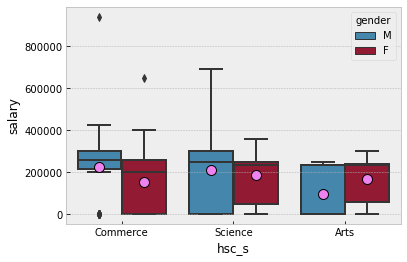

In [43]:
sns.boxplot(x='hsc_s',y='salary',hue='gender',data=preprocessed,showmeans=True,meanprops={'marker':'o'
            ,'markerfacecolor':'violet','markersize':'10','markeredgecolor':'black'})

### Horizontal Plot

<AxesSubplot:xlabel='salary', ylabel='hsc_s'>

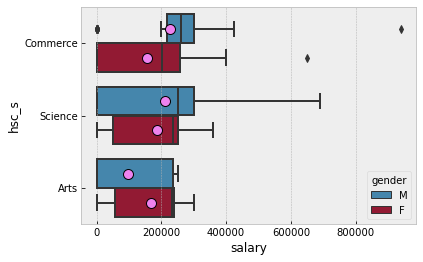

In [44]:
sns.boxplot(y='hsc_s',x='salary',hue='gender',data=preprocessed,showmeans=True,meanprops={'marker':'o'
            ,'markerfacecolor':'violet','markersize':'10','markeredgecolor':'black'})

### Changing color by adding Pallette

<AxesSubplot:xlabel='salary', ylabel='hsc_s'>

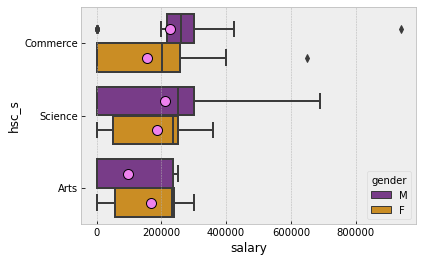

In [45]:
sns.boxplot(y='hsc_s',x='salary',hue='gender',data=preprocessed,showmeans=True,meanprops={'marker':'o'
            ,'markerfacecolor':'violet','markersize':'10','markeredgecolor':'black'},palette='CMRmap')

### Changing Linewidth

<AxesSubplot:xlabel='salary', ylabel='hsc_s'>

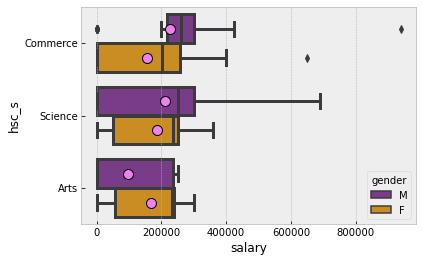

In [46]:
sns.boxplot(y='hsc_s',x='salary',hue='gender',data=preprocessed,showmeans=True,meanprops={'marker':'o'
            ,'markerfacecolor':'violet','markersize':'10','markeredgecolor':'black'},palette='CMRmap',linewidth=3)

### Create Boxplot for Each of the Numeric Variable

<AxesSubplot:>

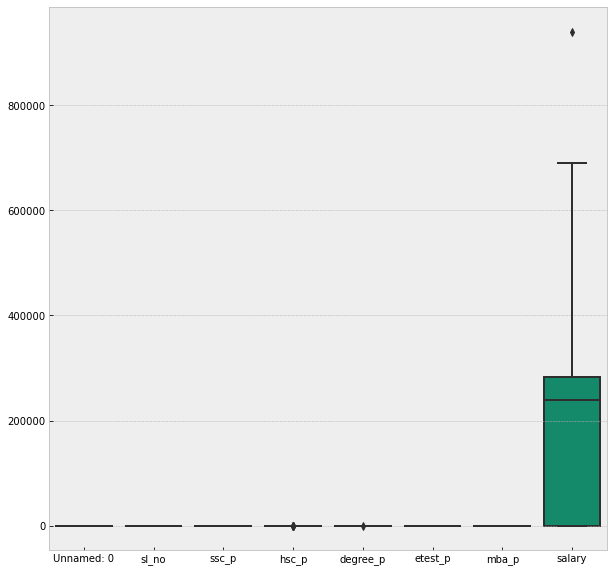

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(data=preprocessed)